<a href="https://colab.research.google.com/github/HARIDIWalid/GenerateJavaDoc/blob/master/WalidHARIDI_Week_6_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini project

# Data Exploration and Preprocessing:

*   1) Load the dataset into your preferred programming environment (Python with libraries like Pandas, NumPy, Scikit-learn is recommended).
*   2) Explore the dataset:
 *   Understand the features (columns) and their types.
 *   Identify the target variable (what you want to predict).
 *   Check for missing values, outliers, or imbalances.
*   3) Preprocess the data if necessary:
 *   Handle missing values (e.g., imputation or removal).
 *   Encode categorical features (if any).
 *   Scale or normalize numerical features (if needed).

## 1) Le choix, l'extraction et l'exploration des données

## Importer les librairies

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder # Pour la standardisation (Z-core) et la normalisation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve

from google.colab import drive

%matplotlib inline

## Le choix des données

* **Jeu de donées** :Le jeu de données fourni, contient des informations liées aux facteurs de risque du diabète et aux indicateurs de santé associés
* **Volume** : 10 000 lignes
* **Source** : (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)
* **Pourquoi?** : Open-source "kaggle" et adapté aux débutants, je le trouve complet pour la prédiction du diabète avec divers paramètres

In [71]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploration des données:
* Le jeu de données est bien choisi (open-source "kaggle", adapté aux débutants) -> Un jeu de données complet pour la prédiction du diabète avec divers paramètres 10000 lignes (https://www.kaggle.com/datasets/marshalpatel3558/diabetes-prediction-dataset)
* Identification claire des variables explicatives et de la cible
* Exploration pertinente (statistiques descriptives, distributions, corrélations)
---


*   Features :
  *   gender : Sexe
  *   age : Âge
  *   hypertension : Hypertension (0 = non, 1 = oui)
  *   heart_disease : Maladie cardiaque (0 = non, 1 = oui)
  *   smoking_history : Historique de tabagisme
  *   bmi : Indice de masse corporelle
  *   HbA1c_level : Taux d'HbA1c
  *   blood_glucose_level : Taux de glucose dans le sang

*   target :
  *   diabetes : Diabète (0 = non, 1 = oui)

---



## Exploration des données

**Statistiques descriptives**

In [72]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**Analyse**

*   Les features : hypertension, heart_disease, diabetes prennent uniquement les valeurs 0 ou 1, ce qui indique l'absence ou la présence de la condition.
*   la feature "age" : je constate que l'age moyen est "~42 ans" , std = "22,5" et le Min/Max : de 0.08 à 80 ans !
  *  Un âge de 0.08 an (~29 jours) est probablement un bébé, ce qui peut être étrange selon le contexte de l’étude.




**Distribution des variables**

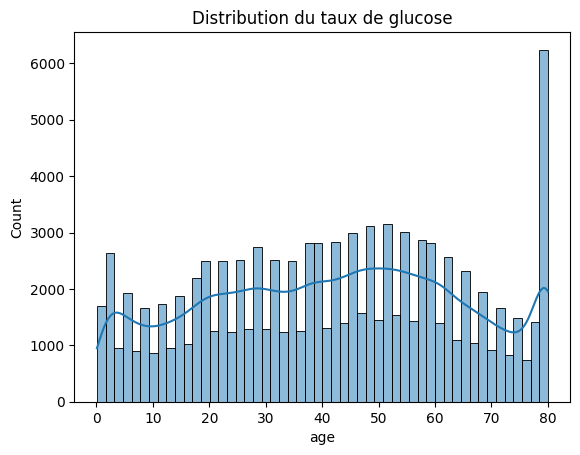

In [73]:
# Distribution de chaque variable (exemple avec Glucose)
sns.histplot(data=df, x='age', kde=True)
plt.title("Distribution du taux de glucose")
plt.show()

##  2) Prétraitement des données (Preprocess the data) :
* Valeurs manquantes correctement traitées (Missing values)
* Variables catégorielles correctement encodées (Encode)
* Variables numériques mises à l'échelle/normalisées si nécessaire (Scale or normalisation)

## Valeurs manquantes correctement traitées

In [74]:
# 1. Vérification des valeurs manquantes
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


**Analyse**

*   Dans notre cas nous n'avons pas de valeurs **null**
*   En supposant qu'il y a des valeurs nulles, selon la situation, on peut les remplacer par la médiane ou bien supprimer la caractéristique si elle contient un grand nombre de valeurs nulles.



## Variables catégorielles correctement encodées

In [75]:
# Vérifier le type des variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Analyse**
* On constate que les variables "gender" et "smoking_history" sont des objets, nous les transformons donc en valeurs numériques avant d'encoder les autres colonnes de type objet

In [76]:
# Encodage des variables catégorielles
le_gender = LabelEncoder()
le_smoking = LabelEncoder()
df["gender"] = le_gender.fit_transform(df["gender"])
df["smoking_history"] = le_smoking.fit_transform(df["smoking_history"])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int64  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int64  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 6.9 MB


**Analyse**
* On constate qu'après l'encodage toutes les colonnes sont numérique
* La méthode fit_transform apprend les catégories uniques dans "gender" (par exemple, "M" pour masculin, "F" pour féminin) et les transforme en valeurs numériques correspondantes (par exemple, "M" pourrait devenir 0 et "F" 1, selon l'ordre des catégories)

## Variables numériques mises à l'échelle/normalisées si nécessaire

In [ ]:
# Normalisation des variables numériques
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']  # Liste des colonnes numériques
scaler = StandardScaler()  # Initialiser le StandardScaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])  # Appliquer la standardisation
print(df[numerical_cols].describe())  # Afficher le résultat

df.head()

**Analyse**  
* Tantque on va utiliser le KNN (K-nearest neighbors), ce modèle est sensibles à l'échelle des données. Dans ce cas, la standardisation est souvent préférée car elle assure que toutes les variables ont une échelle comparable.

9


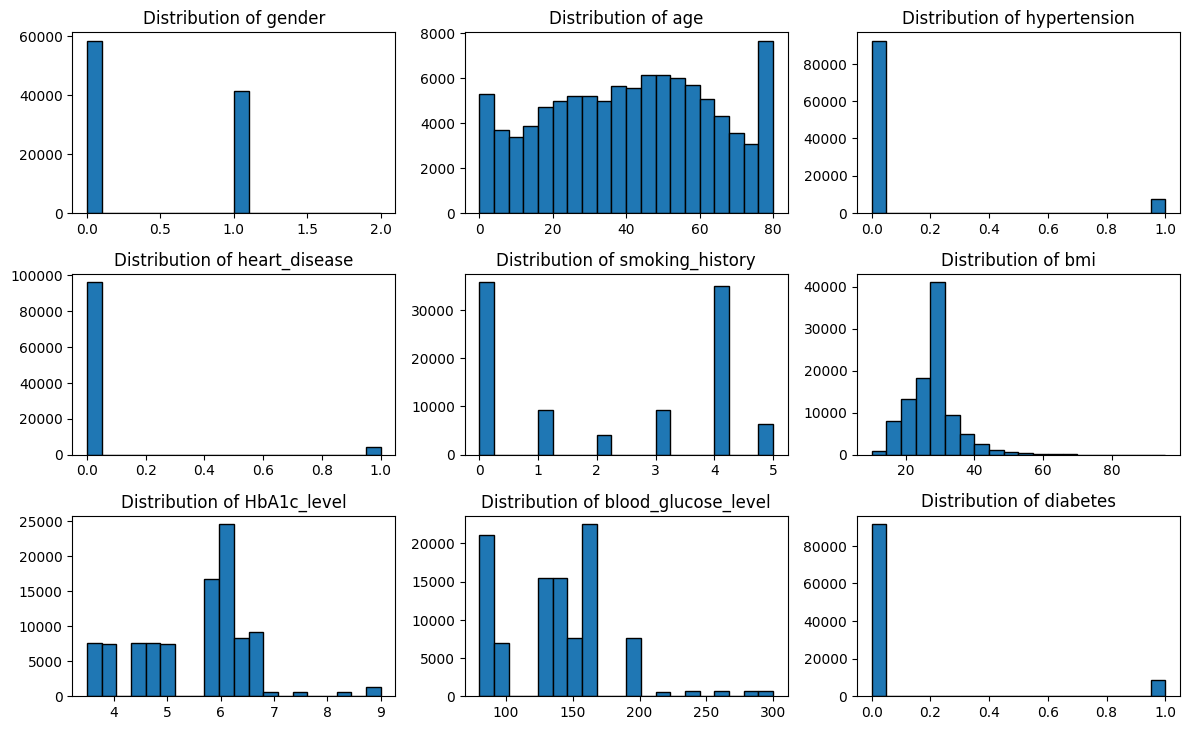

In [78]:
# Data visualisation
print(len(num_col))  # Pour info

plt.figure(figsize=(12,12))
for i in range(len(num_col)):
    plt.subplot(5, 3, i+1)  # Ajuste le nombre de lignes/colonnes si besoin
    plt.hist(df[num_col[i]], bins=20, edgecolor='black')
    plt.title(f'Distribution of {num_col[i]}')

plt.tight_layout()
plt.show()

**Analyse**
* **Age** : Distribution relativement uniforme avec une légère asymétrie.
Données centrées et réduites (normalisées autour de 0) -> Normaliser.
* **Hypertension** et **Heart Disease** (Maladie cardiaque) : 0 (absence d’hypertension) majoritaire.
  * Très déséquilibré : peu de patients hypertendus.
  * Risque de **biais** (Dans ce cas il faut penser à utiliser un équilibrage type **SMOTE plus tard si besoin**).
* **Smoking History** : Plusieurs classes discrètes (0,1,2,3,4,5).
  * Certaines classes sont beaucoup plus fréquentes ➔ un prétraitement comme **One Hot Encoding** peut être utile si tu veux l'utiliser correctement.
* **Blood Glucose Level** (niveau de glucose dans le sang) : Distribution irrégulière avec plusieurs pics

In [79]:
#print(df.head())
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


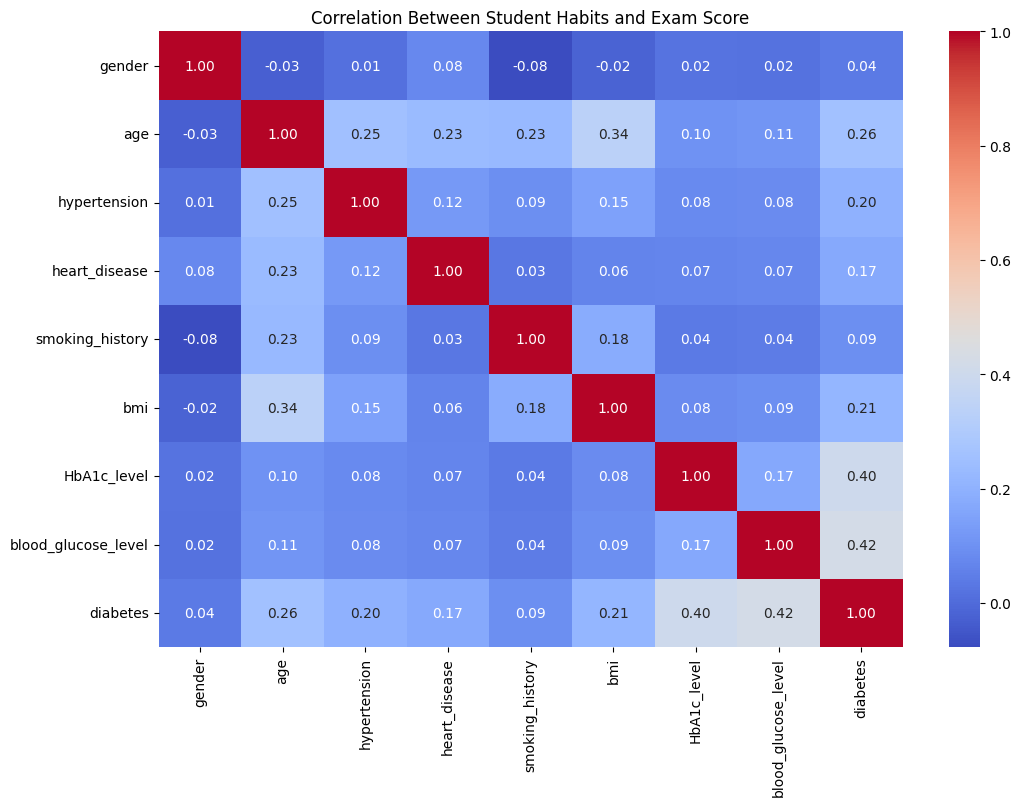

In [80]:
# heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Student Habits and Exam Score')
plt.show()

##  3) 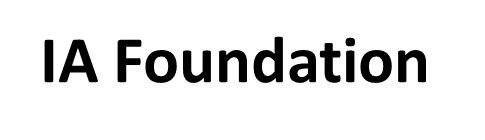Sélection du modèle et justification
* **Algorithme choisi** :
  * KNN (K-Nearest Neighbors)
  * Random Forest : si on veut un modèle plus puissant, capable de capter des relations non linéaires. (Bonus)
* **La justification** :  Classification binaire : prédire si une personne est diabétique (1) ou non (0)

##  4) Prévention de la fuite de données (Data Leakage Prevention)
* Séparation claire entre les ensembles d'entraînement et de test
* Aucune fuite de données lors du prétraitement ou de la fuite de la variable cible
* Méthode de validation appropriée (KNN)

## Séparation claire entre les ensembles d'entraînement et de test

In [81]:
# Séparer les features (X) et target (y)
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [82]:
# Vérifier les dimensions des ensembles de données
print(f"Ensemble d'entraînement X : {X_train.shape}")
print(f"Ensemble de test X : {X_test.shape}")
print(f"Ensemble d'entraînement y : {y_train.shape}")
print(f"Ensemble de test y : {y_test.shape}")


Ensemble d'entraînement X : (75000, 8)
Ensemble de test X : (25000, 8)
Ensemble d'entraînement y : (75000,)
Ensemble de test y : (25000,)


## Aucune fuite de données lors du prétraitement ou de la fuite de la variable cible

In [83]:
scaler = StandardScaler()  # Création du scaler sur les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)   # Application du scaler sur les données de test

**Analyse**
* Il est important de ne pas appliquer .fit_transform() sur X avant de séparer les données, car cela risque de provoquer une fuite de données.

## Méthode de validation appropriée (KNN)

##  Choix du modèle
Tant que il s’agit d’une classification binaire (diabetes = 0 ou 1), on va choisir k-plus proches voisins (KNN) : bon pour des données à faible dimension.

##  Entraînement d’un modèle K-Nearest Neighbors (KNN)
*  Séparer les données
*  Choisir la valeur de K (nombre de voisins)
*  Évaluer les performances
*  Trouver le meilleur K automatiquement
*  Évaluation du modèle

In [84]:
# Choisir la valeur de K
knn = KNeighborsClassifier(n_neighbors=4)

# Train our model
knn.fit(X_train_scaled, y_train)

print(f"Accurancy est : {accuracy_score(y_test, y_pred) * 100:.2f}%")

print(" ------------------------------------------------------------ ")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accurancy est : 96.06%
 ------------------------------------------------------------ 
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22850
           1       0.97      0.56      0.71      2150

    accuracy                           0.96     25000
   macro avg       0.96      0.78      0.84     25000
weighted avg       0.96      0.96      0.96     25000



**Analyse**
* **Interprétation générale :**
  * Le modèle est globalement très performant avec une accuracy de 96%.
  * il y a un déséquilibre entre les classes : bien que le modèle soit très précis pour prédire la classe 0 (précision et rappel proches de 1 pour la classe 0), il a plus de difficulté à prédire la classe 1. En effet, le rappel pour la classe 1 est faible (56%), ce qui signifie qu'il ne parvient pas à identifier une grande partie des exemples réels de la classe 1.
  * Le score F1 pour la classe 1 est de 0.71, ce qui indique que le modèle est raisonnablement performant sur cette classe, mais qu'il pourrait être amélioré.

## Courbe d'apprentissage (Learning Curve)

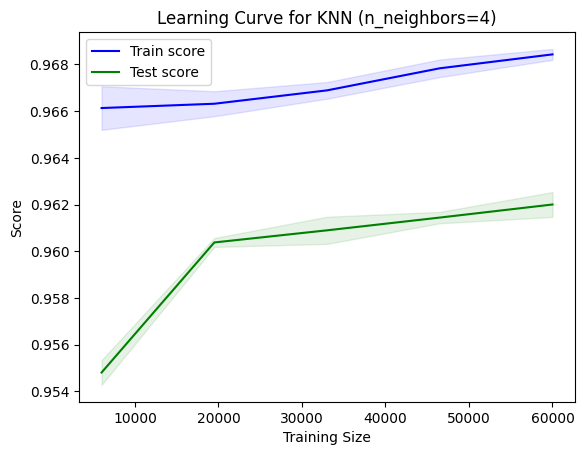

In [85]:
# Générer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_scaled, y_train, cv=5)

# Calcul des moyennes et écarts-types pour les scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Affichage de la courbe d'apprentissage
plt.plot(train_sizes, train_mean, label="Train score", color="blue")
plt.plot(train_sizes, test_mean, label="Test score", color="green")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

# Titres et légendes
plt.title("Learning Curve for KNN (n_neighbors=4)")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

**Analyse**
*

## Recupérer le mieulleur K avec la meilleur précision

Le meilleur nombre de voisins k est : 4
La précision correspondante est : 96.09%


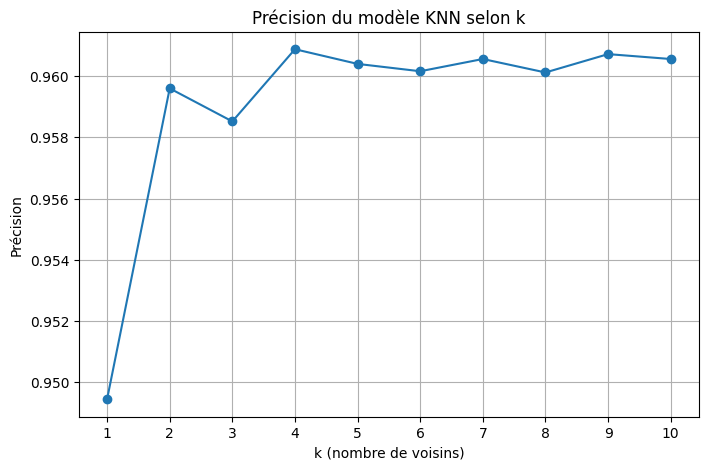

In [63]:

# Tester plusieurs valeurs de k
accuracies = []
k_values = list(range(1, 11))

best_k = 1
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    # Vérifier si ce modèle a la meilleure précision
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

# Afficher le meilleur k et sa précision
print(f"Le meilleur nombre de voisins k est : {best_k}")
print(f"La précision correspondante est : {best_accuracy * 100:.2f}%")

# Affichage
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Précision du modèle KNN selon k")
plt.xlabel("k (nombre de voisins)")
plt.ylabel("Précision")
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Analyse**
* Le résultat que tu as obtenu indique que le modèle KNN fonctionne bien avec un nombre de voisins k=4, ce qui donne une précision de 96.09% sur les données de test. Voici une analyse détaillée de ces résultats :

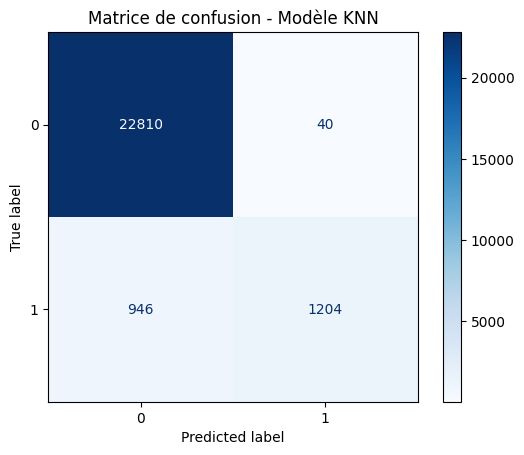

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Générer la matrice
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Affichage
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion - Modèle KNN")
plt.show()

<ipython-input-40-ea98939d1afe>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="viridis")


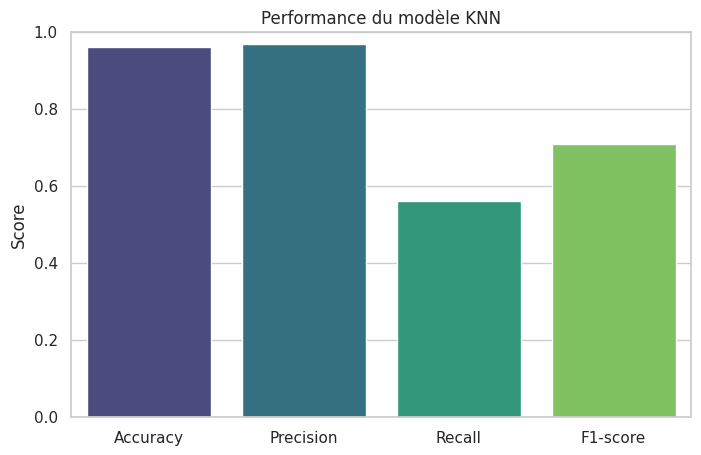

In [ ]:
import seaborn as sns
import numpy as np

# Préparer les données
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Affichage
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=scores, palette="viridis")
plt.ylim(0, 1)
plt.title("Performance du modèle KNN")
plt.ylabel("Score")
plt.show()